In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# player's rule
# 0-5: draw, 6-7: stand, 8-9: natural
player = np.array(['d','d','d','d','d','d','s','s','n','n'])

In [3]:
# banker's rule
# index: banker's score, column: player's 3rd card
banker = pd.DataFrame(columns=range(10),index=range(8))
# d: draw, s: stand, n: natural
banker.loc[0] = 'd'
banker.loc[1] = 'd'
banker.loc[2] = 'd'
banker.loc[3] = 'd'; banker.loc[3][8]= 's'
banker.loc[4] = 's'; banker.loc[4][2:8]= 'd'
banker.loc[5] = 's'; banker.loc[5][4:8]= 'd'
banker.loc[6] = 's'; banker.loc[6][6:8]= 'd'
banker.loc[7] = 's'
banker.loc[8] = 'n'
banker.loc[9] = 'n'

In [41]:
def compare(cards):
    pc, bc = cards[:3], cards[3:]
    # calculate the scores
    ps = (pc[0]+pc[1])%10
    bs = (bc[0]+bc[1])%10
    # the one of them is natural 
    i = player[ps]
    j = banker.loc[bs,pc[2]]
    if (i=='n')|(j=='n'):
        return ps, bs
    # player
    if (i=='d'):
        p3 = pc[2]
        ps = (ps+p3)%10
    # banker
    if (j=='d'):
        b3 = bc[2]
        bs = (bs+b3)%10
    return ps, bs
    
def match(pscore, bscore):
    if pscore > bscore:
        return 'player', 1.   # commission: 5%
    elif pscore == bscore:
        return 'tie', 8.
    else:
        return 'banker', .95

In [42]:
temp = [1,2,3,4,5,6,7,8,9,0,0,0,0]
# A standard 52-card pack
deck = [temp for i in range(4)]
# A number of decks in a shoe
n = 8
shoe = np.array([deck for i in range(n)])
shoe = shoe.reshape(52*n)
shoe.shape

(416,)

In [45]:
df = pd.DataFrame(columns=['winner'])
N = 1e5
t2s = np.floor(shoe.shape[0]/6)-10 # a turn to shuffle
for i in range(int(N)):
    j = int(i%t2s)
    if j==0:
        random.shuffle(shoe)
    cards = shoe[j*6:(j+1)*6]
    ps, bs = compare(cards)
    winner, paid = match(ps, bs)
    df = df.append({'winner':winner}, ignore_index=True)
df

,winner
0,tie
1,banker
2,banker
3,player
4,player
...,...
99995,tie
99996,banker
99997,banker
99998,player


Text(3.0, 0.19999999999999998, '$\\tau$=0.093')

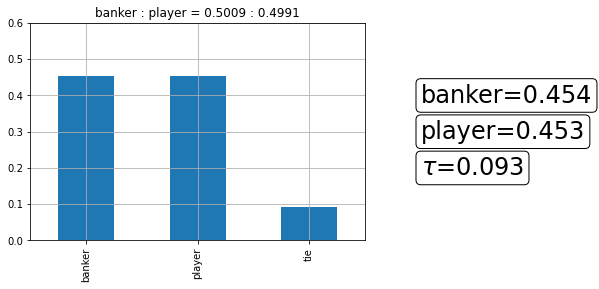

In [54]:
ymax, dy = .6, .1
temp = df.winner.value_counts()/N
tot = temp[:2].sum()
title = '%s : %s = %.4f : %.4f'%(temp.index[0],temp.index[1],temp[0]/tot,temp[1]/tot)
temp.plot(kind='bar', grid=True, ylim=[0,ymax], yticks=np.arange(0,ymax+dy,.1), title=title)
plt.text(3.,ymax*.5+dy, '%s=%.3f'%(temp.index[0],temp[0]),
         {'color': 'black', 'fontsize': 24, 'ha': 'left', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
plt.text(3.,ymax*.5, '%s=%.3f'%(temp.index[1],temp[1]),
         {'color': 'black', 'fontsize': 24, 'ha': 'left', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})
plt.text(3.,ymax*.5-dy, r'$\tau$=%.3f'%temp[2],
         {'color': 'black', 'fontsize': 24, 'ha': 'left', 'va': 'center',
          'bbox': dict(boxstyle="round", fc="white", ec="black", pad=0.2)})